# CA

Start Time : 1626953760.319069 seconds
End Time : 1626953760.324069 seconds
Elapsed Time : 0.005000114440917969 seconds
ACCURACY  SCORE on training data : 0.8854625550660793
ACCURACY  SCORE on test data : 0.8026315789473685
CONFUSION MATRIX basis training data:
[[115   9]
 [ 17  86]]
CONFUSION MATRIX basis testing data:
[[33  8]
 [ 7 28]]


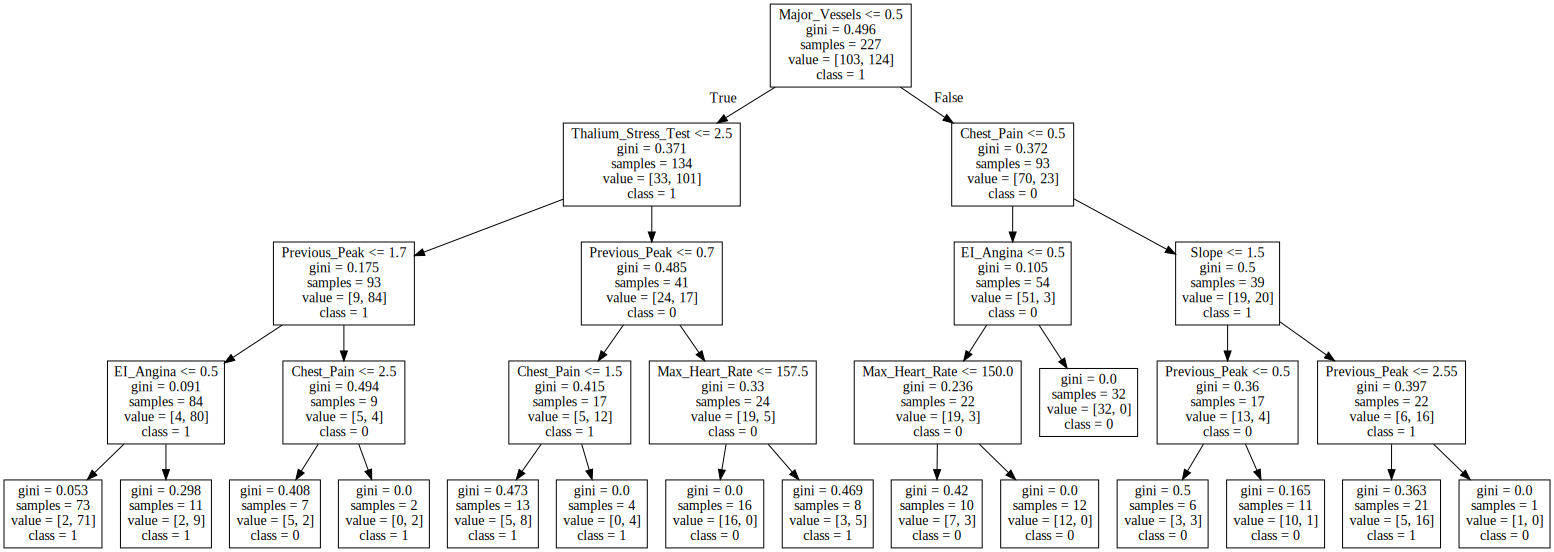

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

heart_data = pd.read_csv('HeartAttack.csv')
df = pd.DataFrame(heart_data, 
               columns=['Output','Chest_Pain', 'Max_Heart_Rate', 'EI_Angina', 'Previous_Peak', 
                        'Slope', 'Major_Vessels', 'Thalium_Stress_Test'])
data = df.iloc[:,1:8]
target = df['Output']

start = time.time()

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

end = time.time()
elapsed=end-start

print('Start Time : {0} seconds'.format(start))
print('End Time : {0} seconds'.format(end))
print('Elapsed Time : {0} seconds'.format(elapsed))

print('ACCURACY  SCORE on training data : {0}'.format(accuracy_score(y_train, dt.predict(x_train))))
print('ACCURACY  SCORE on test data : {0}'.format(accuracy_score(y_test, y_pred)))

print('CONFUSION MATRIX basis training data:')
print(confusion_matrix (y_train, dt.predict(x_train), labels = [1,0]))

print('CONFUSION MATRIX basis testing data:')
print(confusion_matrix(y_test, y_pred, labels = [1,0]))

from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) 
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=["0",  "1"], feature_names= x_train.columns))

# EX 1

In [12]:
# import the things we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


df = pd.read_csv('Decision_Tree_bankloan.csv')
# change the type of these features to `category` for mapping in the next step
df['Age'] = df['Age'].astype('category')
df['Has_job'] = df['Has_job'].astype('category') 
df['Own_house'] = df['Own_house'].astype('category')
df['Outcome'] = df['Outcome'].astype('category') 

# use .cat.codes on `category` type to map all literals to numeric values
df['Age'] = df['Age'].cat.codes
df['Has_job'] = df['Has_job'].cat.codes
df['Own_house'] = df['Own_house'].cat.codes
df['Outcome'] = df['Outcome'].cat.codes

df

# check if the categories are balanced
df['Outcome'].value_counts()

data = df[['Age', 'Has_job', 'Own_house']] # independent variables
target = df['Outcome'] 


x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) # train our model

y_pred = dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns))
# display the tree, with no output file



from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) # display the tree, with no output file
## we can use the model to predict some values

print(dt.predict([[1, 0,1]])) 
print(dt.predict([[1, 0,0]])) 

[1]
[0]


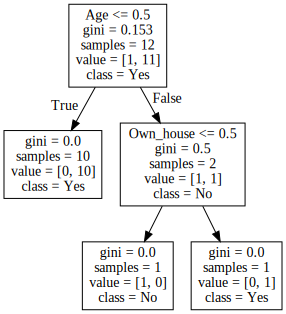

In [13]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) # display the tree, with no output file

# EX 2

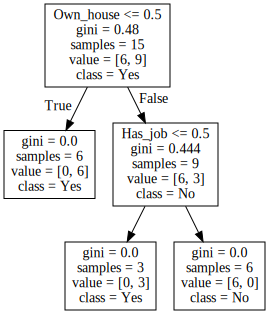

In [10]:
# import the things we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# we want to read in the csv files provided, noticed the path down in the read_csv() can be changed as we like.
df_train = pd.read_csv('Decision_Tree_bankloan-train.csv') # read in training data file
df_test = pd.read_csv('Decision_Tree_bankloan-test.csv') # read in testing data file
df_test.head() # show the first five rows of the test data

### Preprocess the data

#We are going to put training and testing data in two dataframe.

df_train

df_train['Age']

# when we construct the dataframe, Pandas automatically set the type of Has_job and Own_house values to Boolean
# we can change it by mapping them to strings

# dictionary for mapping
boolDict = {
    True: 'True',
    False: 'False'
}

# we should only map these two rows
for i in [1,2]:
    df_train.iloc[:, i] = df_train.iloc[:, i].map(boolDict)
    df_test.iloc[:, i] = df_test.iloc[:, i].map(boolDict)

# to customize what value for each feature to be mapped to 
# we can provide a dictionary that has all the mapping rules


mydict = {
    "Yes": 1,
    "No": 0,
    "True": 0,
    "False": 1,
    "young": 0,
    "middle": 1,
    "old": 2,
    "fair" : 0,
    "good" : 1,
    "excellent" : 2    
}

# construct a function that can take a dataframe and
# map all the categorical values in each column according
# to our dictionary
def outcomeTrans(X):
    cols = list(X)
    for i in cols:
        X[i] = X[i].map(mydict)
    return X
        

# mapping for both dataset
outcomeTrans(df_train)
outcomeTrans(df_test)
df_train.head()

# RUN THIS
# set training data variable & target
# set testing data variable & target
x_train = df_train.iloc[:, 0:4]
y_train = df_train['Outcome']
x_test = df_test.iloc[:, 0:4]
y_test = df_test['Outcome']



# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) # train our model

y_pred = dt.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

x_test_simple = [[1, 0, 1,1]]
y_test_simple = [1]
y_pred_simple = dt.predict(x_test_simple)

from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) # display the tree, with no output file



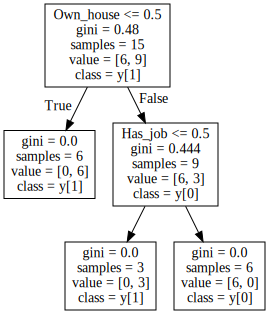

In [11]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file
